# Прогнозная модель для предсказания цен на недвижимость

## 1. Подгрузка соответствующих библиотек и инструментов

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

plt.style.use('fivethirtyeight')

## 2. Подгрузка данных

In [2]:
data = pd.read_csv('C:/Python_for_Data_Science/Kurs_project_task_real/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [4]:
data.head(3)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524


#### Целевая переменная "Price"

## 3. Предварительная обработка данных

### 3.1. Тренировочные данные

#### 1). По признаку "Healthcare_1" отсутствуют значения практически в половине наблюдений. В этой связи полностью удалим эти данные.

In [5]:
data = data.drop('Healthcare_1', axis = 1)

* Отсутствует описание по признаку "Healthcare_1" в связи с чем не совсем понятно, что это такое. Но в случае оценки стоимости квартиры предположим, что данный фактор играет все же не главенствующую роль.

#### 2). По признаку "LifeSquare" (жилая площадь) также отсутствует большое количество значений, но для покупке квартиры это должен быть значимый признак, поэтому его нельзя полностью удалять. Предсказывать пропущенные значения тоже может оказаться непростой задачей, в этой связи избавимся от наблюдений, где отсутствуют значения по нему.

In [6]:
data = data.dropna()

#### 3). Проанализируем различного рода метрики, которые могут быть получены по оставшимся данным.

In [7]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,7887.00000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7.887000e+03,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000,7887.000000
mean,8417.37099,56.670217,1.920375,55.234260,37.199645,7.583238,8.155192,12.438063,4.528251e+03,0.122521,28.480284,6097.788006,7.272981,1.521491,4.531254,223409.768022
std,4864.99023,45.348356,0.856121,20.419782,86.241209,32.002863,5.087991,6.367352,2.257662e+05,0.120083,16.651660,3908.899268,19.682824,1.517006,4.430431,94951.990144
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4222.50000,22.000000,1.000000,41.170089,22.769832,5.000000,4.000000,9.000000,1.971000e+03,0.025609,19.000000,3681.000000,1.000000,0.000000,1.000000,162060.719310
50%,8419.00000,46.000000,2.000000,50.872647,32.781260,7.000000,7.000000,12.000000,1.979000e+03,0.081943,28.000000,5664.000000,2.000000,1.000000,4.000000,200014.336149
75%,12655.00000,88.000000,3.000000,64.704314,45.128803,9.000000,11.000000,17.000000,2.004000e+03,0.194489,38.000000,7759.000000,5.000000,3.000000,6.000000,262296.554087
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,625678.644994


- "Id" - идентификационный номер наблюдения, не требует дополнительной обработки.

- "DistrictId" - идентификационный номер района. По сути тоже пока не требует дополнительной обработки.

- "Rooms": из метрики видно, что есть квартиры с нулевыми значениями, что является нереальным; плюс ко всему следует посмотреть соотношение максимального количества комнат с каким-либо признаком.

In [8]:
data = data.drop(data.loc[data['Rooms']==0].index)

In [9]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7.882000e+03,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,8418.094900,56.681299,1.921594,55.208375,37.165797,7.586907,8.157701,12.441259,4.529860e+03,0.122517,28.488962,6099.654276,7.277214,1.522076,4.532733,223415.041540
std,4865.571805,45.356440,0.855025,20.314383,86.236171,32.012553,5.088145,6.365863,2.258378e+05,0.120106,16.649409,3908.816007,19.688325,1.517008,4.430605,94967.561978
min,0.000000,0.000000,1.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4226.500000,22.000000,1.000000,41.173456,22.772654,5.000000,4.000000,9.000000,1.971000e+03,0.025609,19.000000,3681.000000,1.000000,0.000000,1.000000,162071.919546
50%,8419.500000,46.000000,2.000000,50.856865,32.776846,7.000000,7.000000,12.000000,1.979000e+03,0.081943,28.000000,5664.000000,2.000000,1.000000,4.000000,200009.058393
75%,12656.750000,88.000000,3.000000,64.693027,45.119252,9.000000,11.000000,17.000000,2.004000e+03,0.194489,38.000000,7759.000000,5.000000,3.000000,6.000000,262291.262367
max,16798.000000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,625678.644994


- "Square"- площадь квартиры; может быть использована для сопоставления с другими признаками; минимальное значение крайне сомнительно.

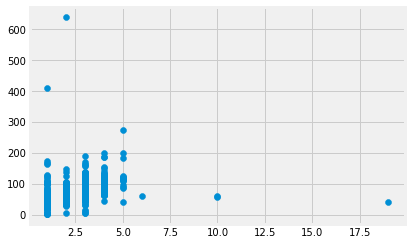

In [10]:
plt.scatter(data['Rooms'],
            data['Square'])
plt.show()

Из полученного графика соотношения комнат с общей площадью квартиры видно, что значения площади приблизительно больше 300 не вписываются в общую концепцию зависимостей; аналогично можно сказать и про комнаты - значения больше 7.5 исключим из обработки.

In [11]:
data = data.drop(data.loc[data['Rooms'] > 7.5].index)

In [12]:
data = data.drop(data.loc[data['Square'] > 300].index)

In [13]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,7877.000000,7877.000000,7877.000000,7877.000000,7877.000000,7877.000000,7877.000000,7877.000000,7.877000e+03,7877.000000,7877.000000,7877.000000,7877.00000,7877.000000,7877.000000,7877.000000
mean,8417.955059,56.692015,1.917481,55.089500,37.043999,7.585756,8.154500,12.441031,4.531460e+03,0.122532,28.488257,6099.046972,7.26279,1.521391,4.529389,223456.315614
std,4865.873359,45.359443,0.823287,18.798519,85.894020,32.022666,5.084094,6.364538,2.259095e+05,0.120121,16.643684,3906.681150,19.63645,1.516694,4.425336,94958.784328
min,0.000000,0.000000,1.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.00000,0.000000,0.000000,59174.778028
25%,4226.000000,22.000000,1.000000,41.167479,22.770349,5.000000,4.000000,9.000000,1.971000e+03,0.025609,19.000000,3681.000000,1.00000,0.000000,1.000000,162105.027164
50%,8419.000000,46.000000,2.000000,50.833326,32.767366,7.000000,7.000000,12.000000,1.979000e+03,0.081943,28.000000,5664.000000,2.00000,1.000000,4.000000,200019.013481
75%,12657.000000,88.000000,3.000000,64.683637,45.108803,9.000000,11.000000,17.000000,2.004000e+03,0.194489,38.000000,7759.000000,5.00000,3.000000,6.000000,262295.078518
max,16798.000000,209.000000,6.000000,275.645284,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.00000,6.000000,23.000000,625678.644994


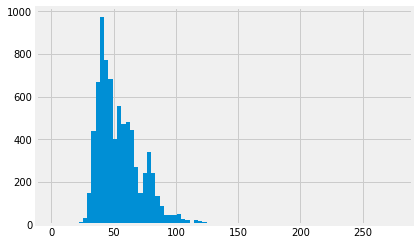

In [14]:
plt.hist(data['Square'], bins=80)
plt.show()

Как можно видеть из полученной гистограммы есть чрезмерно маленькие значения площади. Скорее всего это некоректные значения. Удалим их (количество бинов подбиралось произвольно, в ручном режиме).

In [15]:
data.loc[data['Square'] < 15, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,1,11,B,458378.777006


Судя по всему, некорректные значения присущи наблюдениям значения площади которых меньше 13.784864 (условия подбирались вручную).

In [16]:
data = data.drop(data.loc[data['Square'] < 13.784864].index)

In [17]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,7866.000000,7866.000000,7866.000000,7866.000000,7866.000000,7866.000000,7866.000000,7866.000000,7.866000e+03,7866.000000,7866.000000,7866.000000,7866.000000,7866.000000,7866.000000,7866.000000
mean,8416.222222,56.733282,1.918129,55.161194,37.067455,7.595093,8.150013,12.444572,4.535018e+03,0.122538,28.505339,6102.449911,7.270531,1.522121,4.530892,223376.615050
std,4866.672966,45.368619,0.823161,18.713490,85.945674,32.044076,5.074561,6.358403,2.260674e+05,0.120161,16.637736,3905.627265,19.648929,1.516623,4.426054,94845.495147
min,0.000000,0.000000,1.000000,13.784865,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4217.500000,22.000000,1.000000,41.183399,22.801084,5.000000,4.000000,9.000000,1.971000e+03,0.025609,19.000000,3684.000000,1.000000,0.000000,1.000000,162120.790485
50%,8415.000000,46.000000,2.000000,50.895450,32.782779,7.000000,7.000000,12.000000,1.979000e+03,0.081943,28.000000,5664.000000,2.000000,1.000000,4.000000,200016.674815
75%,12656.750000,88.000000,3.000000,64.706474,45.119252,9.000000,11.000000,17.000000,2.004000e+03,0.194489,38.000000,7759.000000,5.000000,3.000000,6.000000,262257.133028
max,16798.000000,209.000000,6.000000,275.645284,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,625678.644994


- "LifeSquare"- жилая площадь. По логике вещей она не должна быть больше общей площади. В соответствии с этим удалим те значения, которые не соответствуют данному условию.

In [18]:
data = data.drop(data.loc[data['Square'] < data['LifeSquare']].index)

In [19]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7.395000e+03,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000,7395.000000
mean,8426.488032,58.252738,1.926842,54.906902,34.458273,7.835835,8.042461,12.359432,4.696481e+03,0.123800,29.383097,6275.008519,7.132522,1.564571,4.597160,224983.247786
std,4862.846465,45.837765,0.823267,18.348155,15.919618,32.957195,4.979301,6.052299,2.331556e+05,0.120556,16.260207,3849.796577,18.672252,1.514510,4.342594,94519.189906
min,0.000000,0.000000,1.000000,16.117154,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4240.500000,22.000000,1.000000,41.208098,22.547261,5.000000,4.000000,9.000000,1.970000e+03,0.033494,21.000000,3893.000000,1.000000,0.000000,1.000000,163917.921297
50%,8428.000000,47.000000,2.000000,50.450732,32.017235,8.000000,7.000000,12.000000,1.979000e+03,0.089040,30.000000,5731.000000,3.000000,1.000000,4.000000,201222.824645
75%,12672.500000,90.000000,3.000000,64.429224,43.777274,9.000000,11.000000,17.000000,2.003000e+03,0.194489,39.000000,7759.000000,5.000000,3.000000,6.000000,264654.675763
max,16798.000000,209.000000,6.000000,275.645284,233.949309,2014.000000,42.000000,99.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,625678.644994


- "KitchenSquare" - площадь кухни. Эта еще одна площадь, которая нам известна. Данное значение в сумме с жилой площадью не должно быть больше общей площади квартиры. В соответствии с этим удалим подобные значения, если они есть в совкупности данных.

In [20]:
data = data.drop(data.loc[data['Square'] < (data['LifeSquare'] + data['KitchenSquare'])].index)

In [21]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,7033.000000,7033.000000,7033.000000,7033.000000,7033.000000,7033.000000,7033.000000,7033.000000,7.033000e+03,7033.000000,7033.000000,7033.000000,7033.000000,7033.000000,7033.000000,7033.000000
mean,8430.864496,59.250533,1.935589,54.743062,33.374318,7.157827,7.956775,12.242855,4.835215e+03,0.124606,29.947533,6379.221385,7.114318,1.600171,4.653064,226150.270521
std,4860.717072,46.217469,0.821343,18.220159,14.844677,3.267223,4.923286,6.000915,2.390808e+05,0.121164,15.980219,3802.315270,18.310913,1.514890,4.302807,94100.879043
min,0.000000,0.000000,1.000000,16.117154,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4242.000000,22.000000,1.000000,41.112165,22.346269,5.000000,4.000000,9.000000,1.970000e+03,0.033494,21.000000,4231.000000,1.000000,0.000000,1.000000,165534.541425
50%,8445.000000,48.000000,2.000000,50.306294,31.472119,7.000000,7.000000,12.000000,1.978000e+03,0.090799,30.000000,5735.000000,3.000000,1.000000,4.000000,201994.184775
75%,12674.000000,92.000000,3.000000,64.168513,42.386721,9.000000,11.000000,17.000000,2.001000e+03,0.194489,39.000000,7960.000000,6.000000,3.000000,6.000000,265563.582184
max,16798.000000,209.000000,6.000000,275.645284,233.949309,58.000000,42.000000,99.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,625678.644994


- "Floor" - этаж на котором находится квартира. В соответствии с оставшимися данными значения выглядят вполне реалистичными.

- "HouseFloor" - этажность дома. В соответствии с оставшимися данными некоректным выглядит минимальное значение. Возможно это 1-ый этаж, но тем не менее исключим подобные наблюдения.

In [22]:
data = data.drop(data.loc[data['HouseFloor'] == 0].index)

In [23]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,6998.000000,6998.000000,6998.000000,6998.000000,6998.000000,6998.000000,6998.000000,6998.000000,6.998000e+03,6998.000000,6998.000000,6998.000000,6998.000000,6998.000000,6998.000000,6998.000000
mean,8431.230780,59.376536,1.936696,54.721157,33.389028,7.185053,7.956702,12.304087,4.849455e+03,0.124729,30.061446,6402.182909,7.144327,1.607316,4.670191,226403.966083
std,4860.848271,46.256069,0.821930,18.225137,14.802360,3.241448,4.925047,5.952949,2.396779e+05,0.121145,15.920095,3793.084492,18.351382,1.514680,4.303626,94154.620288
min,0.000000,0.000000,1.000000,16.117154,0.370619,0.000000,1.000000,1.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4239.750000,22.000000,1.000000,41.107808,22.353940,5.000000,4.000000,9.000000,1.970000e+03,0.033494,21.000000,4346.000000,1.000000,0.000000,1.000000,165711.464038
50%,8445.500000,48.000000,2.000000,50.252421,31.464433,8.000000,7.000000,12.000000,1.978000e+03,0.090799,30.000000,5776.000000,3.000000,1.000000,4.000000,202172.200008
75%,12674.750000,92.000000,3.000000,64.129557,42.387718,9.000000,11.000000,17.000000,2.001000e+03,0.194489,39.000000,7960.000000,6.000000,3.000000,6.000000,266077.291231
max,16798.000000,209.000000,6.000000,275.645284,233.949309,58.000000,42.000000,99.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,625678.644994


- "HouseYear" - год постройки. Странным является максимальное значение.

In [24]:
data.loc[data['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


Странными являются найденные значения (условие подбиралось вручную). Удалим их.

In [25]:
data = data.drop(data.loc[data['HouseYear'] > 2020].index)

In [26]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000,6996.000000
mean,8430.436249,59.356918,1.936821,54.725071,33.391626,7.185106,7.957118,12.304603,1983.920240,0.124700,30.062178,6402.455546,7.142653,1.606632,4.669525,226397.633150
std,4861.311288,46.247007,0.821971,18.226160,14.803518,3.241733,4.925509,5.953668,18.811041,0.121140,15.922256,3793.574354,18.353668,1.514262,4.304027,94167.287990
min,0.000000,0.000000,1.000000,16.117154,0.370619,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4238.750000,22.000000,1.000000,41.109564,22.356037,5.000000,4.000000,9.000000,1970.000000,0.033494,21.000000,4346.000000,1.000000,0.000000,1.000000,165692.485600
50%,8444.000000,48.000000,2.000000,50.258198,31.467721,8.000000,7.000000,12.000000,1978.000000,0.090799,30.000000,5776.000000,3.000000,1.000000,4.000000,202160.750470
75%,12675.750000,92.000000,3.000000,64.132253,42.402034,9.000000,11.000000,17.000000,2001.000000,0.194489,39.000000,7960.000000,6.000000,3.000000,6.000000,266084.725390
max,16798.000000,209.000000,6.000000,275.645284,233.949309,58.000000,42.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,625678.644994


- "Ecology_1" - коэффициент экологии. Построим гистограмму распределения.

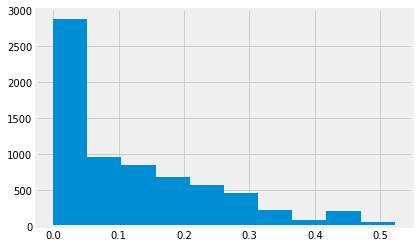

In [27]:
plt.hist(data['Ecology_1'])
plt.show()

Выглядит правдоподобно.

- "Social_1" - какой-то социальный коэффициент. Также как и в предыдущем случае построим гистрограмму распредления.

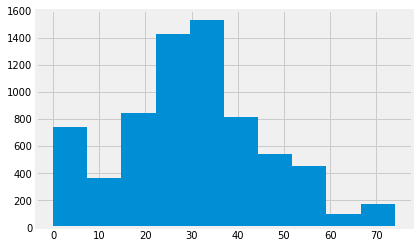

In [28]:
plt.hist(data['Social_1'])
plt.show()

Тоже вполне правдоподобно.

- "Social_2" - еще один какой-то социальный коэффициент.

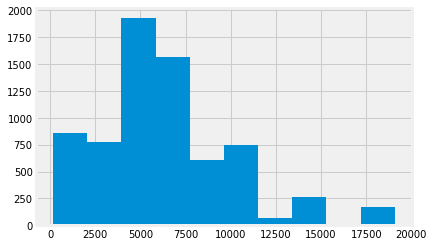

In [29]:
plt.hist(data['Social_2'])
plt.show()

Явных неточностей не обнаружено.

- "Social_3" - последний социальный коэффициент.

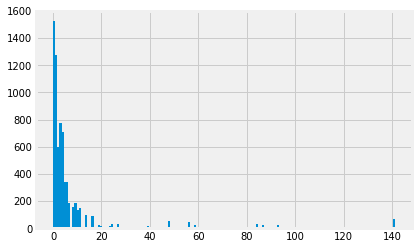

In [30]:
plt.hist(data['Social_3'], bins=160)
plt.show()

Подозрительными являются значения больше 120, но возможно это какие-то уникальные постройки. Оставим все без изменений.

- "Helthcare_2" - какой-то коэффициент описывающий уровень здравоохранения.

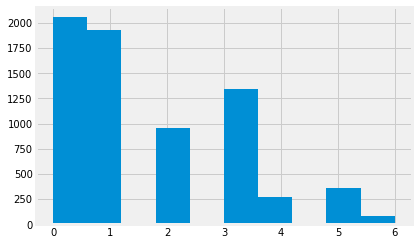

In [31]:
plt.hist(data['Helthcare_2'])
plt.show()

Правдоподобно.

 - "Shops_1" - коэффициент описывающий доступность магазинов.

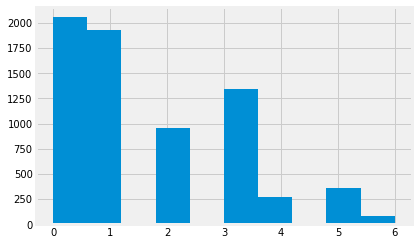

In [32]:
plt.hist(data['Helthcare_2'])
plt.show()

Убедительно.

* При пересмотре 9-ой лекции увидел интересное условие, которое указывает на то, что этаж квартиры не должен быть больше общего количества этажей в доме.

In [33]:
data = data.drop(data.loc[data['Floor'] > (data['HouseFloor'])].index)

In [34]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,6011.00000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000,6011.000000
mean,8426.17834,59.419897,1.935285,54.611960,33.377324,7.381301,7.500749,12.984029,1984.382632,0.124671,30.461820,6497.451006,6.971719,1.609882,4.703710,227696.252726
std,4841.27925,46.366284,0.821490,18.004104,14.245887,3.104987,4.717700,5.728588,18.532500,0.121113,15.953186,3822.305683,17.789082,1.512025,4.276339,94351.195763
min,0.00000,0.000000,1.000000,16.117154,0.795539,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4265.50000,21.000000,1.000000,41.058593,22.396711,6.000000,4.000000,9.000000,1970.000000,0.033494,22.000000,4378.000000,1.000000,0.000000,1.000000,166577.475077
50%,8449.00000,50.000000,2.000000,50.400951,31.557066,8.000000,7.000000,12.000000,1980.000000,0.090799,30.000000,5889.000000,3.000000,1.000000,4.000000,203635.158576
75%,12647.00000,93.000000,3.000000,64.056487,42.276238,9.000000,10.000000,17.000000,2001.000000,0.194489,39.000000,7960.000000,6.000000,3.000000,6.000000,268557.638140
max,16798.00000,208.000000,6.000000,275.645284,233.949309,58.000000,42.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,625678.644994


### 3.2. Данные для оценки

In [35]:
test = pd.read_csv('C:/Python_for_Data_Science/Kurs_project_task_real/test.csv')

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


Удалим столбец с коэффициентом, описывающим уровень здравоохранения.

In [37]:
test = test.drop('Healthcare_1', axis = 1)

In [38]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


"Id" и "DistrictId" оставим без изменения. С "Rooms" необходимо внести корректировки. Вначале обнаружим некоректные значения.

In [39]:
test.loc[test['Rooms'] < 1, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,0,0,B


In [40]:
test_Rooms_zero = test.loc[test['Rooms'] < 1, :]

Для того, чтобы заменить нулевые значения "Rooms" на более точные, составим прогнозную модель от общей площади квартиры (Square), жилой (LifeSquare) и значений площади кухни (KitchenSquare) по общей совокупности тренировочных данных.

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
Rooms_model = LinearRegression()

In [43]:
feats_Rooms_model = ['Square', 'LifeSquare', 'KitchenSquare']

In [44]:
Rooms_model.fit(data.loc[:, feats_Rooms_model], data['Rooms'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
np.round(Rooms_model.predict(test_Rooms_zero.loc[:, feats_Rooms_model]))

array([5., 3.])

In [46]:
test.loc[test['Id'] == 3343, 'Rooms'] = 5

In [47]:
test.loc[test['Id'] == 10729, 'Rooms'] = 3

In [48]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.911600,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.839003,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


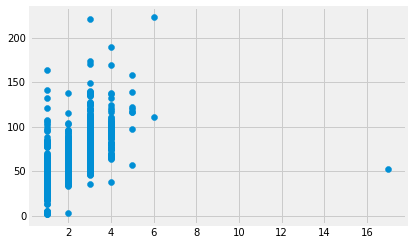

In [49]:
plt.scatter(test['Rooms'],
            test['Square'])
plt.show()

In [50]:
test.loc[test['Rooms'] > 6, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B


Обнаруженное значение чересчур большое. Заменим его на прогнозное по составленной модели.

In [51]:
test_Rooms_max = test.loc[test['Rooms'] > 6, :]

In [52]:
np.round(Rooms_model.predict(test_Rooms_max.loc[:, feats_Rooms_model]))

array([2.])

In [53]:
test.loc[test['Id'] == 1435, 'Rooms'] = 2

In [54]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908600,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.811405,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


Перейдем к обработке и анализу "Square".

In [55]:
test.loc[test['Square'] < 13, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,1,3,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,3,23,B
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,0,0,B
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,0,0,B
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,0,0,B
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,0,0,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,0,0,B
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,3,2,B


In [56]:
test_Square_min = test.loc[test['Square'] < 13, :]

In [57]:
Square_model = LinearRegression()

In [58]:
feats_Square_model = ['Rooms', 'LifeSquare', 'KitchenSquare']

In [59]:
Square_model.fit(data.loc[:, feats_Square_model], data['Square'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
Square_model.predict(test_Square_min.loc[:, feats_Square_model])

array([16.2896005 , 18.31708107, 16.39012536, 17.99312794, 16.66012532,
       17.38614758, 64.99034234, 17.34015724])

In [61]:
test.loc[test['Id'] == 9011, 'Square'] = Square_model.predict(test_Square_min.loc[:, feats_Square_model]) [0]

In [62]:
test.loc[test['Id'] == 16401, 'Square'] = Square_model.predict(test_Square_min.loc[:, feats_Square_model]) [1]

In [63]:
test.loc[test['Id'] == 2138, 'Square'] = Square_model.predict(test_Square_min.loc[:, feats_Square_model]) [2]

In [64]:
test.loc[test['Id'] == 10120, 'Square'] = Square_model.predict(test_Square_min.loc[:, feats_Square_model]) [3]

In [65]:
test.loc[test['Id'] == 1165, 'Square'] = Square_model.predict(test_Square_min.loc[:, feats_Square_model]) [4]

In [66]:
test.loc[test['Id'] == 7855, 'Square'] = Square_model.predict(test_Square_min.loc[:, feats_Square_model]) [5]

In [67]:
test.loc[test['Id'] == 170, 'Square'] = Square_model.predict(test_Square_min.loc[:, feats_Square_model]) [6]

In [68]:
test.loc[test['Id'] == 1420, 'Square'] = Square_model.predict(test_Square_min.loc[:, feats_Square_model]) [7]

In [69]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908600,56.481176,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.811405,19.031408,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,13.305531,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.912403,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.924953,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


In [70]:
test.loc[test['Square'] < test['LifeSquare'], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,5,5,B
27,11160,58,1.0,48.610661,48.752502,1.0,4,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
39,6624,27,1.0,42.413793,42.434887,10.0,12,17.0,2017,0.011654,B,B,4,915,0,0,0,B
43,11513,1,1.0,37.484057,40.593036,0.0,4,17.0,1977,0.007122,B,B,1,264,0,0,1,B
70,1872,30,2.0,52.449057,52.798349,1.0,17,17.0,2016,0.000078,B,B,22,6398,141,3,23,B
102,10749,6,2.0,65.582572,66.675758,1.0,4,2.0,2017,0.243205,B,B,5,1564,0,0,0,B
143,3895,21,1.0,36.514818,37.209976,7.0,10,9.0,1973,0.194489,B,B,47,8004,3,3,5,B
206,16055,62,3.0,108.218901,108.272277,10.0,4,17.0,2017,0.072158,B,B,2,629,1,0,0,A
261,16000,27,2.0,66.929231,68.087510,12.0,4,17.0,2018,0.072158,B,B,2,629,1,0,0,A
272,9887,1,2.0,53.658350,54.975247,10.0,10,17.0,2017,0.007122,B,B,1,264,0,0,1,B


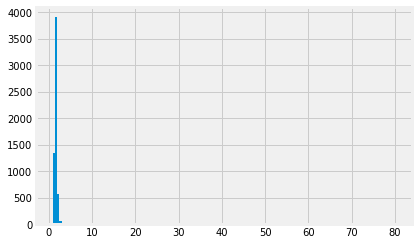

In [71]:
plt.hist(data['Square']/data['LifeSquare'], bins=160)
plt.show()

In [72]:
(data['Square']/data['LifeSquare']).median()

1.6557500232151712

In [73]:
Square_LS = test.loc[test['Square'] < test['LifeSquare']]

In [74]:
test.loc[test['Square'] < test['LifeSquare'], 'Square'] = Square_LS['LifeSquare'] * (data['Square']/data['LifeSquare']).median()

In [75]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908600,58.571949,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.811405,23.180092,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,13.305531,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,42.258201,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,54.101185,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,68.113585,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,501.809972,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


In [76]:
test.loc[test['Square'] < (test['LifeSquare'] + test['KitchenSquare'])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,26.406309,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,5,5,B
29,891,85,2.0,65.550690,61.689280,10.0,13,22.0,1988,0.037178,B,B,52,11217,1,1,7,B
45,9519,62,3.0,81.912997,75.872094,11.0,3,6.0,2015,0.072158,B,B,2,629,1,0,0,A
55,5452,27,1.0,48.587913,42.596190,12.0,3,2.0,2016,0.017647,B,B,2,469,0,0,0,B
160,7425,27,1.0,41.439889,39.267051,10.0,8,22.0,2017,0.211401,B,B,9,1892,0,0,1,B
270,7268,14,2.0,66.479723,64.169820,10.0,14,17.0,2017,0.042032,B,B,37,6856,84,2,5,B
299,6190,111,1.0,34.126319,33.138594,5.0,5,5.0,1969,0.135650,B,B,46,7960,6,3,11,B
320,12041,27,1.0,45.109346,38.510017,11.0,13,0.0,1977,0.017647,B,B,2,469,0,0,0,B
327,1338,6,2.0,52.381959,51.789611,1.0,9,7.0,2016,0.243205,B,B,5,1564,0,0,0,B
329,6524,30,2.0,67.692682,67.678098,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,3,23,B


In [77]:
Square_LSKS = test.loc[test['Square'] < (test['LifeSquare'] + test['KitchenSquare'])]

In [78]:
Square_LSKS['KitchenSquare'] = (Square_LSKS['Square'] - Square_LSKS['LifeSquare']).astype(int)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
test.loc[test['Square'] < (test['LifeSquare'] + test['KitchenSquare']), 'KitchenSquare'] = Square_LSKS['KitchenSquare']

In [80]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908600,58.571949,36.158810,5.603200,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.811405,23.180092,17.825287,4.249019,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,13.305531,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,42.258201,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,54.101185,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,68.113585,45.174091,8.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,501.809972,303.071094,73.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


Замена нулевых значений "HouseFloor" в test.

In [81]:
HouseFloor_min = test.loc[test['HouseFloor'] == 0]
HouseFloor_min['HouseFloor'] = HouseFloor_min['Floor']*2
test.loc[test['HouseFloor'] == 0, 'HouseFloor'] = HouseFloor_min['HouseFloor']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [82]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908600,58.571949,36.158810,5.603200,8.632000,13.092200,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.811405,23.180092,17.825287,4.249019,5.483228,6.780744,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,13.305531,0.333490,0.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,42.258201,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,54.101185,32.925087,6.000000,7.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,68.113585,45.174091,8.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,501.809972,303.071094,73.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


Замена некорректных значений "HouseFloor".

In [83]:
test.loc[test['HouseFloor'] < test['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,0,2,B
10,15975,61,3.0,64.543658,42.651541,7.0,10,9.0,1981,0.300323,B,B,52,10311,6,1,9,B
14,5214,27,1.0,37.555197,NaN,1.0,5,1.0,1977,0.211401,B,B,9,1892,0,0,1,B
27,11160,58,1.0,80.721956,48.752502,1.0,4,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
36,9348,205,1.0,37.480811,16.851795,8.0,6,5.0,1933,0.169091,B,B,19,3856,10,2,5,B
41,12749,21,2.0,49.011976,27.980195,5.0,6,5.0,1969,0.194489,B,B,47,8004,3,3,5,B
55,5452,27,1.0,48.587913,42.596190,5.0,3,2.0,2016,0.017647,B,B,2,469,0,0,0,B
58,2831,21,1.0,21.452899,15.798509,3.0,11,9.0,1972,0.194489,B,B,47,8004,3,3,5,B
59,10614,27,1.0,44.254995,NaN,1.0,3,1.0,1977,0.211401,B,B,9,1892,0,0,1,B
65,10929,48,1.0,40.767892,37.236548,1.0,20,19.0,2017,0.041125,B,B,46,9515,5,1,10,B


In [84]:
Floor_HF = test.loc[test['HouseFloor'] < test['Floor']]
Floor_HF['Floor'] = Floor_HF['HouseFloor']/2
Floor_HF.loc[Floor_HF['Floor'] == 0.5, 'Floor'] = 1
Floor_HF['Floor'] = round(Floor_HF['Floor'])
test.loc[test['HouseFloor'] < test['Floor'], 'Floor'] = Floor_HF['Floor']

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ver

In [85]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.908600,58.571949,36.158810,5.603200,7.503600,13.092200,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.811405,23.180092,17.825287,4.249019,5.114178,6.780744,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,1.000000,13.305531,0.333490,0.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,42.258201,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,54.101185,32.925087,6.000000,6.000000,14.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,68.113585,45.174091,8.000000,10.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,6.000000,501.809972,303.071094,73.000000,46.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null float64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(8), object(3)
memory usage: 703.2+ KB


Остались пропущенные значения в столбце "LifeSquare". Заменим их на значения равные частному общей площади по рассматриваемому наблюдению к медианному значению, найденному в строчке "72".

In [87]:
test['LifeSquare'] = test['LifeSquare'].fillna(test['Square']/((data['Square']/data['LifeSquare']).median()))

### 3.3. Тип данных

Приведем данные к единному виду.

In [88]:
data['Rooms'] = np.int64(data['Rooms'])
data['HouseFloor'] = np.int64(data['HouseFloor'])

In [89]:
test['Rooms'] = np.int64(test['Rooms'])
test['Floor'] = np.int64(test['Floor'])
test['HouseFloor'] = np.int64(test['HouseFloor'])

### 3.4. Категориальные признаки

In [90]:
data = pd.get_dummies(data)
data = data.drop('Ecology_2_B', axis = 1)
data = data.drop('Ecology_3_B', axis = 1)
data = data.drop('Shops_2_B', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6011 entries, 0 to 9999
Data columns (total 19 columns):
Id               6011 non-null int64
DistrictId       6011 non-null int64
Rooms            6011 non-null int64
Square           6011 non-null float64
LifeSquare       6011 non-null float64
KitchenSquare    6011 non-null float64
Floor            6011 non-null int64
HouseFloor       6011 non-null int64
HouseYear        6011 non-null int64
Ecology_1        6011 non-null float64
Social_1         6011 non-null int64
Social_2         6011 non-null int64
Social_3         6011 non-null int64
Helthcare_2      6011 non-null int64
Shops_1          6011 non-null int64
Price            6011 non-null float64
Ecology_2_A      6011 non-null uint8
Ecology_3_A      6011 non-null uint8
Shops_2_A        6011 non-null uint8
dtypes: float64(5), int64(11), uint8(3)
memory usage: 815.9 KB


In [91]:
data = data.rename(columns={'Ecology_2_A': 'Ecology_2', 'Ecology_3_A': 'Ecology_3', 'Shops_2_A': 'Shops_2'})

In [92]:
test = pd.get_dummies(test)
test = test.drop('Ecology_2_B', axis = 1)
test = test.drop('Ecology_3_B', axis = 1)
test = test.drop('Shops_2_B', axis = 1)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null int64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null int64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Shops_2_A        5000 non-null uint8
dtypes: float64(4), int64(11), uint8(3)
memory usage: 600.7 KB


In [93]:
test = test.rename(columns={'Ecology_2_A': 'Ecology_2', 'Ecology_3_A': 'Ecology_3', 'Shops_2_A': 'Shops_2'})

# 4. Построение базовой модели.

### train_test_split

При разбиении на тренировочную и валидационную части датасета, отведенного для моделирования, используем принцип Парето и разделим его как 80 : 20 (позже изменена на 70 : 30 - чуть коэффициент детерминации рос на валидации и совсем немного падал на тренировочной совокупности).

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [96]:
train.shape, valid.shape

((4207, 19), (1804, 19))

In [97]:
base_model = LinearRegression()

In [98]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Ecology_2', 'Ecology_3',
       'Shops_2'],
      dtype='object')

In [99]:
feats = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2', 'Ecology_3',
       'Shops_2']

In [100]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4207 entries, 5427 to 1428
Data columns (total 19 columns):
Id               4207 non-null int64
DistrictId       4207 non-null int64
Rooms            4207 non-null int64
Square           4207 non-null float64
LifeSquare       4207 non-null float64
KitchenSquare    4207 non-null float64
Floor            4207 non-null int64
HouseFloor       4207 non-null int64
HouseYear        4207 non-null int64
Ecology_1        4207 non-null float64
Social_1         4207 non-null int64
Social_2         4207 non-null int64
Social_3         4207 non-null int64
Helthcare_2      4207 non-null int64
Shops_1          4207 non-null int64
Price            4207 non-null float64
Ecology_2        4207 non-null uint8
Ecology_3        4207 non-null uint8
Shops_2          4207 non-null uint8
dtypes: float64(5), int64(11), uint8(3)
memory usage: 571.1 KB


# 5. LinearRegression

In [101]:
base_model.fit(train.loc[:, feats], train['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [102]:
pred_train = base_model.predict(train.loc[:, feats])

In [103]:
pred_train

array([150943.9554025 , 308603.19583391, 265935.00356849, ...,
       261129.53335556, 263683.504548  , 146463.54502368])

In [104]:
valid_train = base_model.predict(valid.loc[:, feats])

In [105]:
valid_train

array([377842.32973019, 293677.10451005, 252320.45406489, ...,
       292940.06981681, 341663.08958342, 186818.91472304])

In [106]:
from sklearn.metrics import r2_score

In [107]:
r2_score(train['Price'], pred_train)

0.5574698170842891

In [108]:
r2_score(valid['Price'], valid_train)

0.5216195914865936

# 6. Ridge

In [109]:
from sklearn.linear_model import Ridge

In [110]:
model = Ridge(alpha=1.0)

In [111]:
model.fit(train.loc[:, feats], train['Price'])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [112]:
pred_train = model.predict(train.loc[:, feats])

In [113]:
pred_train

array([150992.23712793, 308508.57626029, 265895.64017901, ...,
       261122.52035936, 263634.94285783, 146369.08063603])

In [114]:
valid_train = model.predict(valid.loc[:, feats])

In [115]:
valid_train

array([377850.11256126, 293660.64647911, 252236.81274187, ...,
       293051.59151013, 341671.24896155, 186729.2870107 ])

In [116]:
r2_score(train['Price'], pred_train)

0.5574685341125305

In [117]:
r2_score(valid['Price'], valid_train)

0.5216738020995562

# 7. RandomForestRegressor

In [118]:
from sklearn.ensemble import RandomForestRegressor as RF

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [119]:
model = RF(n_estimators=1000, max_depth=15, random_state=42)

In [120]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [121]:
pred_train = model.predict(train.loc[:, feats])

In [122]:
pred_train

array([102212.52079127, 265498.80352206, 333508.02581189, ...,
       352590.92060601, 209065.79424107,  98620.51652597])

In [123]:
r2_score(train['Price'], pred_train)

0.9425642576642856

In [124]:
valid_train = model.predict(valid.loc[:, feats])

In [125]:
valid_train

array([380966.17910952, 311180.10894107, 193788.2280615 , ...,
       335774.42072318, 150006.19165924, 201899.0231245 ])

In [126]:
r2_score(valid['Price'], valid_train)

0.6568119257549263

# 8. Предсказания на тесте

In [127]:
test.shape

(5000, 18)

In [128]:
test['Price'] = model.predict(test.loc[:, feats])

In [129]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2,Ecology_3,Shops_2,Price
0,725,58,2,49.882643,33.432782,6.0,6,14,1972,0.310199,11,2748,1,0,0,0,0,0,157003.709145
1,15856,74,2,69.263183,41.831909,1.0,1,1,1977,0.075779,6,1437,3,0,2,0,0,0,159854.086349
2,5480,190,1,26.406309,15.948246,10.0,2,5,1909,0.000000,30,7538,87,5,5,0,0,0,207332.575521
3,15664,47,2,73.046609,51.940842,9.0,22,22,2007,0.101872,23,4583,3,3,3,0,0,0,342596.367711
4,14275,27,1,47.527111,43.387569,1.0,17,17,2017,0.072158,2,629,1,0,0,0,0,1,130426.392929


In [130]:
test.loc[:, ['Id', 'Price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
Id       5000 non-null int64
Price    5000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 78.2 KB


In [131]:
test.loc[:, ['Id', 'Price']].to_csv('DAlferev_predictions.csv', index=None)